# Crawling

In [3]:
!pip3 install beautifulsoup4
!pip3 install newspaper3k
!pip3 install konlpy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 211 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 5.3 MB/s eta 0:00:011
     |████████████████████████████████| 174 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 7.4 MB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 10.4 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 7.7 MB/s eta 0:00:011
     |████████████████████████████████| 302 kB 4.2 MB/s eta 0:00:01
     |█████████████████████████████

In [4]:
from bs4 import BeautifulSoup

#- HTML 문서를 문자열 html로 저장합니다.
html = '''
<html> 
    <head> 
    </head> 
    <body> 
        <h1> 장바구니
            <p id='clothes' class='name' title='라운드티'> 라운드티
                <span class = 'number'> 25 </span> 
                <span class = 'price'> 29000 </span> 
                <span class = 'menu'> 의류</span> 
                <a href = 'http://www.naver.com'> 바로가기 </a> 
            </p> 
            <p id='watch' class='name' title='시계'> 시계
                <span class = 'number'> 28 </span>
                <span class = 'price'> 32000 </span> 
                <span class = 'menu'> 악세서리 </span> 
                <a href = 'http://www.facebook.com'> 바로가기 </a> 
            </p> 
        </h1> 
    </body> 
</html>
'''

#- BeautifulSoup 인스턴스를 생성합니다.
#- 두번째 매개변수는 분석할 분석기(parser)의 종류입니다.
soup = BeautifulSoup(html, 'html.parser')

In [5]:
print(soup.select('body'))

[<body>
<h1> 장바구니
            <p class="name" id="clothes" title="라운드티"> 라운드티
                <span class="number"> 25 </span>
<span class="price"> 29000 </span>
<span class="menu"> 의류</span>
<a href="http://www.naver.com"> 바로가기 </a>
</p>
<p class="name" id="watch" title="시계"> 시계
                <span class="number"> 28 </span>
<span class="price"> 32000 </span>
<span class="menu"> 악세서리 </span>
<a href="http://www.facebook.com"> 바로가기 </a>
</p>
</h1>
</body>]


In [7]:
print(soup.select('p'))

[<p class="name" id="clothes" title="라운드티"> 라운드티
                <span class="number"> 25 </span>
<span class="price"> 29000 </span>
<span class="menu"> 의류</span>
<a href="http://www.naver.com"> 바로가기 </a>
</p>, <p class="name" id="watch" title="시계"> 시계
                <span class="number"> 28 </span>
<span class="price"> 32000 </span>
<span class="menu"> 악세서리 </span>
<a href="http://www.facebook.com"> 바로가기 </a>
</p>]


In [8]:
print(soup.select('h1 .name .menu'))

[<span class="menu"> 의류</span>, <span class="menu"> 악세서리 </span>]


In [9]:
print(soup.select('html > h1'))

[]


In [10]:
soup.select('html h1')

[<h1> 장바구니
             <p class="name" id="clothes" title="라운드티"> 라운드티
                 <span class="number"> 25 </span>
 <span class="price"> 29000 </span>
 <span class="menu"> 의류</span>
 <a href="http://www.naver.com"> 바로가기 </a>
 </p>
 <p class="name" id="watch" title="시계"> 시계
                 <span class="number"> 28 </span>
 <span class="price"> 32000 </span>
 <span class="menu"> 악세서리 </span>
 <a href="http://www.facebook.com"> 바로가기 </a>
 </p>
 </h1>]

In [12]:
from newspaper import Article

#- 파싱할 뉴스 기사 주소입니다.
url = 'https://www.mk.co.kr/news/it/10916188'

#- 언어가 한국어이므로 language='ko'로 설정해줍니다.
article = Article(url, language='ko')
article.download()
article.parse()

In [13]:
#- 기사 제목을 출력합니다.
print('기사 제목 :')
print(article.title)
print('')

#- 기사 내용을 출력합니다.
print('기사 내용 :')
print(article.text)

기사 제목 :
상상도 못한 일들 펼쳐진다 … 2024 'AI의 대진격'

기사 내용 :
미라클 레터

실리콘밸리의 올 AI시장 '10가지 전망'

사진 확대 AI가 탑재된 메타의 스마트 선글라스. 메타

사진 확대 마이크로소프트 자체 개발 AI칩 '마이아'로 만들어진 데이터센터 랙. MS

사진 확대

2023년은 생성형 AI의 한 해라고 말해도 될 정도로 인공지능이 산업과 경제의 중심에 자리 잡았다. 2022년 11월 세상에 등장한 오픈AI의 챗GPT가 엄청난 인기를 얻으면서 전 세계 사람들의 머릿속에 '인공지능(AI)'을 각인시켰다. 미라클레터는 주요 테크 전문 매체와 전문가들의 분석을 통해 2024년 AI산업에서 일어날 일을 예측해봤다.1 멀티 모달리티는 모든 AI의 표준이 될듯2023년 11월 오픈AI가 공개한 GPT4 터보는 멀티 모달리티 능력을 갖췄다. 거대언어모델(LLM)이 텍스트만 이해하는 것이 아니라 이미지와 음성까지 이해하는 능력이다. 12월 공개된 구글 제미나이도 멀티 모달리티 능력을 갖췄다. 이런 멀티 모달리티 능력은 앞으로 나오는 모든 LLM 기반 인공지능의 표준이 될 것이라는 전망이 지배적이었다. 캐시 가오 사파이어벤처스 파트너는 "2024년에는 텍스트, 이미지, 오디오와 같은 데이터가 멀티 모달 형태로 융합하면서 AI에 대한 재정의가 이뤄질 것"이라며 "이러한 모델을 사용하는 스타트업은 더 나은 의사 결정을 가능케 할 뿐 아니라 사용자 경험을 향상할 것"으로 내다봤다.2 제미나이 프로 수준의 오픈소스 모델 기대기업들의 AI 개발 경쟁은 AI 모델과 데이터를 비공개하는 기업 소유 AI와 이를 공개하는 오픈소스 AI의 두 가지 흐름으로 이어지고 있다. 챗GPT, 제미나이, 미드저니 등이 대표적인 기업 소유 AI이며 라마2, 스테이블디퓨전, 미스트랄 등이 대표적인 오픈소스 AI다. 오픈소스 AI는 자금이나 데이터 측면에서 기업 소유 AI보다 불리한 점이 많다. 하지만 개방적인 생태계를 통해서 많은 개발자와 스타트업의 참여를 이끌 수 있다는

## URL List 생성

In [18]:
# 크롤러를 만들기 전 필요한 도구들을 임포트합니다.
import requests
import pandas as pd
from bs4 import BeautifulSoup

# 페이지 수, 카테고리, 날짜를 입력값으로 받습니다.
def make_urllist(page_num, code, date): 
    urllist= []
    for i in range(1, page_num + 1):
        url = 'https://news.naver.com/main/list.nhn?mode=LSD&mid=sec&sid1='+str(code)+'&date='+str(date)+'&page='+str(i)
        headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.90 Safari/537.36'}
        news = requests.get(url, headers=headers)

        # BeautifulSoup의 인스턴스 생성합니다. 파서는 html.parser를 사용합니다.
        soup = BeautifulSoup(news.content, 'html.parser')

        # CASE 1
        news_list = soup.select('.newsflash_body .type06_headline li dl')
        # CASE 2
        news_list.extend(soup.select('.newsflash_body .type06 li dl'))
        
        # 각 뉴스로부터 a 태그인 <a href ='주소'> 에서 '주소'만을 가져옵니다.
        for line in news_list:
            urllist.append(line.a.get('href'))
    return urllist

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [19]:
url_list = make_urllist(2, 105, 20231128)
print('뉴스 기사의 개수: ',len(url_list))

뉴스 기사의 개수:  40


In [20]:
url_list[:5]

['https://n.news.naver.com/mnews/article/009/0005222155?sid=105',
 'https://n.news.naver.com/mnews/article/020/0003533945?sid=105',
 'https://n.news.naver.com/mnews/article/092/0002313077?sid=105',
 'https://n.news.naver.com/mnews/article/008/0004967473?sid=105',
 'https://n.news.naver.com/mnews/article/056/0011611479?sid=105']

In [21]:
idx2word = {'100' : '정치', '101' : '경제', '102' : '사회', '103' : '생활/문화', '105' : 'IT/과학'}

## News Dataframe 생성

In [22]:
from newspaper import Article

#- 데이터프레임을 생성하는 함수입니다.
def make_data(urllist, code):
    text_list = []
    for url in urllist:
        article = Article(url, language='ko')
        article.download()
        article.parse()
        text_list.append(article.title)

    #- 데이터프레임의 'news' 키 아래 파싱한 텍스트를 밸류로 붙여줍니다.
    df = pd.DataFrame({'news': text_list})

    #- 데이터프레임의 'code' 키 아래 한글 카테고리명을 붙여줍니다.
    df['code'] = idx2word[str(code)]
    return df

In [23]:
data = make_data(url_list, 100)
#- 상위 10개만 출력해봅니다.
data[:10]

,news,code
0,우리 할머니 인슐린 주사 그만 맞아도 될까…‘당뇨 완치’ 길 열리나,정치
1,"강스템바이오텍, ‘퓨어스템 오에이 키트주’ 임상 순항… “기술수출에 최선”",정치
2,"DN솔루션즈, 獨 테크니컬 센터 열어…""유럽 시장 잡는다""",정치
3,대구경북과학기술원 신임 총장에 이건우 서울대 전 공대 학장,정치
4,울산 남구 테크노산업로 일원 자율주행차 시범운행지구 지정,정치
5,"유니스트, ‘세계에서 가장 영향력 있는 연구자’ 9명",정치
6,"이용훈 총장, 과기부 장관 ‘물망’…유니스트는?",정치
7,"쿠쿠전자, 대용량 '아이편한 가습기 7S' 출시",정치
8,욕설 논란에 카르텔 폭로까지…스텝 꼬인 김범수 쇄신안,정치
9,“이런 XXX같은” 욕설 회의... 카카오 임원 “문제점 지적하다 실수”,정치


In [24]:
code_list = [102, 103, 105]

code_list

[102, 103, 105]

## 대상 New Category의 전체 News Dataframe 생성

In [25]:
def make_total_data(page_num, code_list, date):
    df = None

    for code in code_list:
        url_list = make_urllist(page_num, code, date)
        df_temp = make_data(url_list, code)
        print(str(code)+'번 코드에 대한 데이터를 만들었습니다.')

        if df is not None:
            df = pd.concat([df, df_temp])
        else:
            df = df_temp

    return df

## 특정 날짜 대상 News Category의 News Dataframe 생성

In [26]:
df = make_total_data(1, code_list, 20231128)

102번 코드에 대한 데이터를 만들었습니다.
103번 코드에 대한 데이터를 만들었습니다.
105번 코드에 대한 데이터를 만들었습니다.


In [27]:
print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  60


In [28]:
df.sample(10)

,news,code
11,울산 오늘 낮 최고 기온 10.7도…내일 1~9도,생활/문화
0,"조수미·이정재·싸이, 엑스포 PT 등장…“공존의 도시 부산에 오세요” [엑스포 개최...",생활/문화
13,"""우리 부산은요""…핵심 비전 소개하는 나승연 홍보대사",사회
5,세계일보 사건팀 장애인본부 ‘이달의 좋은 기사상’,사회
5,"유니스트, ‘세계에서 가장 영향력 있는 연구자’ 9명",IT/과학
17,작곡계 노벨상 받은 진은숙… 베를린 필 ‘진 에디션’ 발매,생활/문화
19,[날씨] 내일 더 추워져…일부 강원·경북 '한파특보',생활/문화
9,"동아제약, 중대재해 대응 모의훈련 실시…심폐소생술 등 교육",생활/문화
7,"쿠쿠전자, 대용량 '아이편한 가습기 7S' 출시",IT/과학
17,동해 묵호항 ‘항만대기질 관리구역’ 지정 요구,사회


## 대량 데이터 수집

In [29]:
df = make_total_data(2, code_list, 20231231)

import os

# 데이터프레임 파일을 csv 파일로 저장합니다.
# 저장경로는 이번 프로젝트를 위해 만든 폴더로 지정해 주세요.
csv_path = "/Users/kenny_jung/aiffel/news_crawler/news_data.csv"
df.to_csv(csv_path, index=False)

if os.path.exists(csv_path):
    print('{} File Saved!'.format(csv_path))

102번 코드에 대한 데이터를 만들었습니다.
103번 코드에 대한 데이터를 만들었습니다.
105번 코드에 대한 데이터를 만들었습니다.
/Users/kenny_jung/aiffel/news_crawler/news_data.csv File Saved!


## 

## 데이터 전처리

In [30]:
csv_path = "/Users/kenny_jung/aiffel/news_crawler/news_data.csv"
df = pd.read_table(csv_path, sep=',')
df.head()

,news,code
0,"오세훈 ""'약자동행'으로 따뜻함 채우고 서울 매력 더할 것""",사회
1,동해안·제주도 해돋이 보기 어려울 듯,사회
2,'제야의 종' 올리는 보신각…새해맞이 인파 몰려,사회
3,"아크-순천향대, 펫푸드 개발·연구인력 양성 협약",사회
4,[포토] 어둠 살라먹고 2024 희망아 솟아라,사회


In [31]:
# 정규 표현식을 이용해서 한글 외의 문자는 전부 제거합니다.
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['news']

0               오세훈 "'약자동행'으로 따뜻함 채우고 서울 매력 더할 것"
1                            동해안·제주도 해돋이 보기 어려울 듯
2                      '제야의 종' 올리는 보신각…새해맞이 인파 몰려
3                      아크-순천향대, 펫푸드 개발·연구인력 양성 협약
4                       [포토] 어둠 살라먹고 2024 희망아 솟아라
                          ...                    
115               한국항공우주학회 새 회장에 황창전 항우연 UAM 연구부장
116                            나노엔텍 "올초 유럽 지사 설립"
117    '전청조'·'칼부림'도 아니었다…2023년 대한민국 휩쓴 화제의 뉴스 1위는
118           “살고 싶어서 그랬어요” 10대 손목에 난 상처들…무슨 사연이?
119    2024년 ‘게임 스트리밍’ 격돌 예고…아프리카TV, BJ 아닌 ‘스트리머’
Name: news, Length: 120, dtype: object

In [32]:
print(df.isnull().sum())

news    0
code    0
dtype: int64


In [33]:
# 중복된 샘플들을 제거합니다.
df.drop_duplicates(subset=['news'], inplace=True)

print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  107


## 뉴스 분석

In [34]:
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [35]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

<Axes: xlabel='code'>

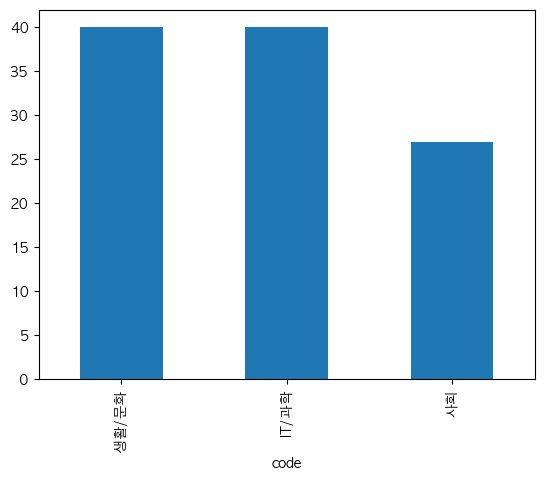

In [36]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "AppleGothic"

df['code'].value_counts().plot(kind = 'bar')

In [37]:
print(df.groupby('code').size().reset_index(name = 'count'))

    code  count
0  IT/과학     40
1     사회     27
2  생활/문화     40


In [57]:
!pip3 install install mecab-python3

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [58]:
!pip3 install konlpy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [59]:
!pip3 install mecab

Defaulting to user installation because normal site-packages is not writeable
  Using cached mecab-0.996.3.tar.gz (62 kB)
    ERROR: Command errored out with exit status 1:
     command: /Library/Developer/CommandLineTools/usr/bin/python3 -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/pip-install-5rrx4bi0/mecab_1171586433bb4df9a2c3ed201a2206d7/setup.py'"'"'; __file__='"'"'/private/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/pip-install-5rrx4bi0/mecab_1171586433bb4df9a2c3ed201a2206d7/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/pip-pip-egg-info-nevitpao
         cwd: /private/var/folders/b9/d_8nll_s47g6w2x0spn

In [60]:
!pip3 install install mecab-ko-dic

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [61]:
from konlpy.tag import Mecab
tokenizer = Mecab()

kor_text = '밤에 귀가하던 여성에게 범죄를 시도한 대 남성이 구속됐다서울 제주경찰서는 \
            상해 혐의로 씨를 구속해 수사하고 있다고 일 밝혔다씨는 지난달 일 피해 여성을 \
            인근 지하철 역에서부터 따라가 폭행을 시도하려다가 도망간 혐의를 받는다피해 \
            여성이 저항하자 놀란 씨는 도망갔으며 신고를 받고 주변을 수색하던 경찰에 \
            체포됐다피해 여성은 이 과정에서 경미한 부상을 입은 것으로 전해졌다'

#- 형태소 분석, 즉 토큰화(tokenization)를 합니다.
print(tokenizer.morphs(kor_text))

Exception: The MeCab dictionary does not exist at "/usr/local/lib/mecab/dic/mecab-ko-dic". Is the dictionary correctly installed?
You can also try entering the dictionary path when initializing the Mecab class: "Mecab('/some/dic/path')"

In [46]:
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']

In [47]:
# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수입니다.
def preprocessing(data):
  text_data = []

  for sentence in data:
    temp_data = []
    #- 토큰화
    temp_data = tokenizer.morphs(sentence) 
    #- 불용어 제거
    temp_data = [word for word in temp_data if not word in stopwords] 
    text_data.append(temp_data)

  text_data = list(map(' '.join, text_data))

  return text_data

In [48]:
text_data = preprocessing(df['news'])
print(text_data[0])

NameError: name 'tokenizer' is not defined

In [ ]:
!pip3 install sklearn

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [44]:
#- 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 0)

NameError: name 'text_data' is not defined

In [62]:
!brew install mecab
!brew install mecab-ipadic
!brew install mecab-ko-dic
!pip install mecab-python3

zsh:1: command not found: brew
zsh:1: command not found: brew
zsh:1: command not found: brew
zsh:1: command not found: pip
